In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

# Step 1: Load and clean data
df = pd.read_csv("SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv")
df = df.drop(columns=["Unnamed: 7"], errors="ignore")
df = df.drop(index=0)  # Drop duplicate header row
df["Supply Chain Emission Factors without Margins"] = pd.to_numeric(
    df["Supply Chain Emission Factors without Margins"], errors="coerce"
)
df_cleaned = df.dropna(subset=["Supply Chain Emission Factors without Margins"])

# Step 2: Save cleaned data as CSV
df_cleaned.to_csv("preprocessed_data.csv", index=False)

# Step 3: Train model
features = [col for col in df_cleaned.columns if col.startswith("DQ ")]
X = df_cleaned[features].apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(df_cleaned["Supply Chain Emission Factors without Margins"], errors='coerce')

X = X.dropna()
y = y.loc[X.index]

model = LinearRegression()
model.fit(X, y)

# Step 4: Save model as .pkl
with open("forecasting_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("preprocessed_data.csv and forecasting_model.pkl have been created successfully.")


preprocessed_data.csv and forecasting_model.pkl have been created successfully.


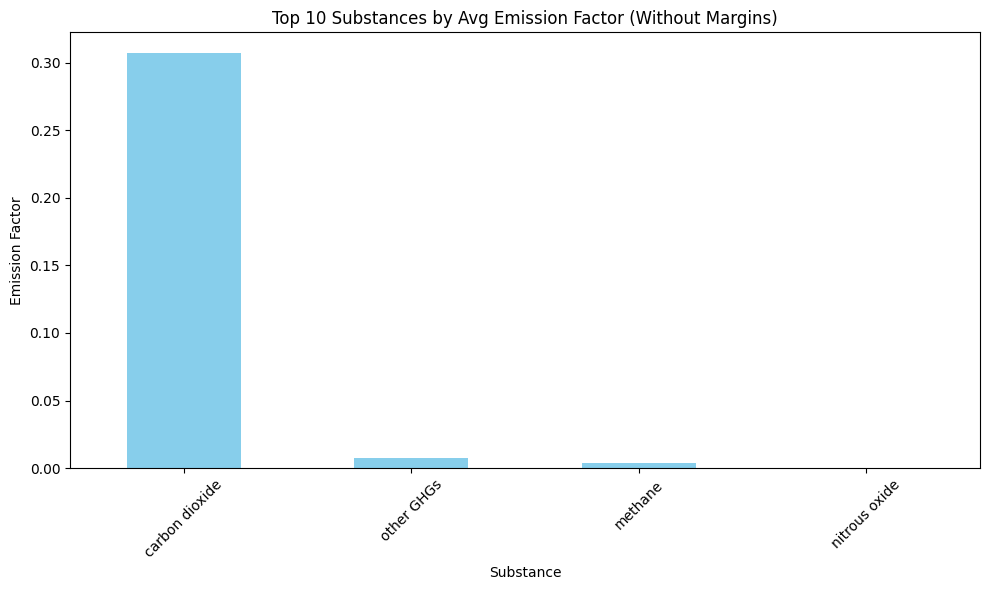

In [ ]:
import matplotlib.pyplot as plt

# Group and sort substances
substance_avg = (
    df_cleaned.groupby("Substance")["Supply Chain Emission Factors without Margins"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
substance_avg.plot(kind="bar", color="skyblue")
plt.title("Top 10 Substances by Avg Emission Factor (Without Margins)")
plt.ylabel("Emission Factor")
plt.xlabel("Substance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


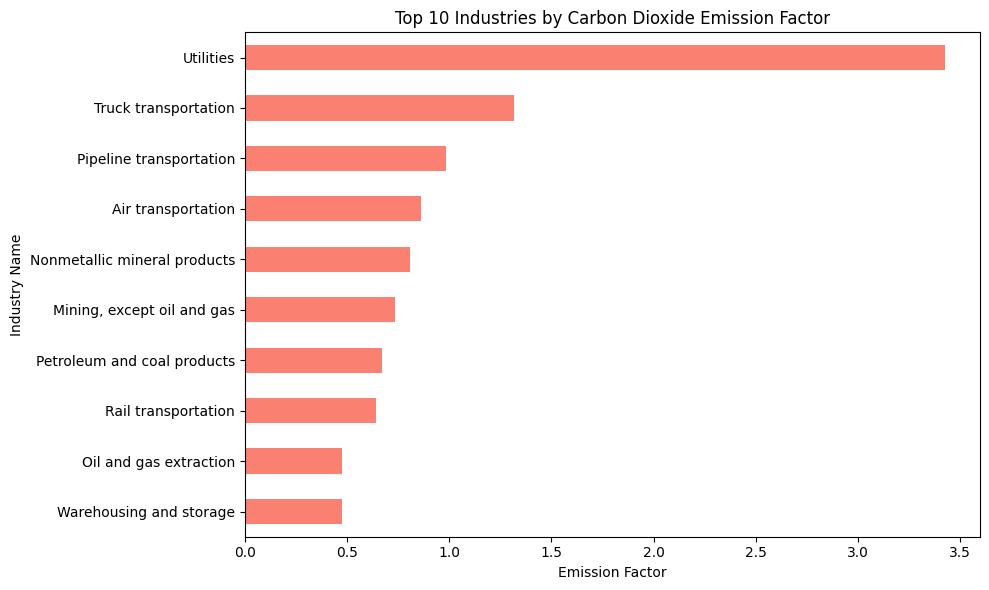

In [ ]:
# Filter for carbon dioxide
co2_df = df_cleaned[df_cleaned["Substance"] == "carbon dioxide"]

# Group and sort industries
top_co2_industries = (
    co2_df.groupby("Industry Name")["Supply Chain Emission Factors without Margins"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
top_co2_industries.plot(kind="barh", color="salmon")
plt.title("Top 10 Industries by Carbon Dioxide Emission Factor")
plt.xlabel("Emission Factor")
plt.ylabel("Industry Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


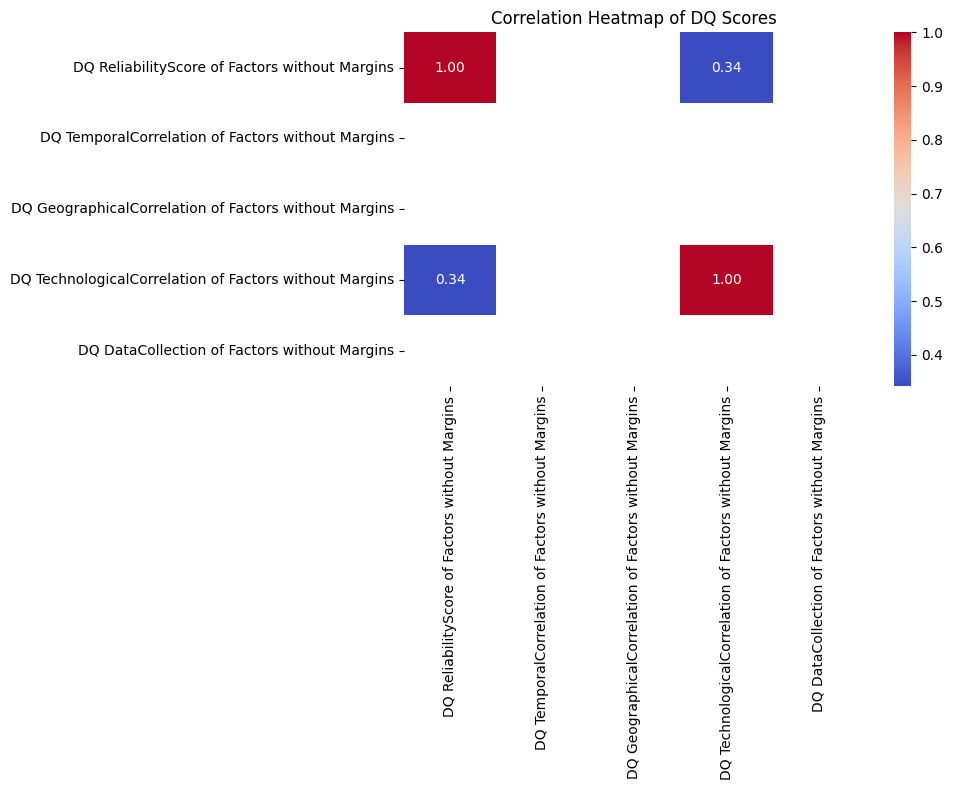

In [ ]:
import seaborn as sns

# Select DQ score columns
dq_columns = [col for col in df_cleaned.columns if col.startswith("DQ ")]
dq_corr = df_cleaned[dq_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dq_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of DQ Scores")
plt.tight_layout()
plt.show()


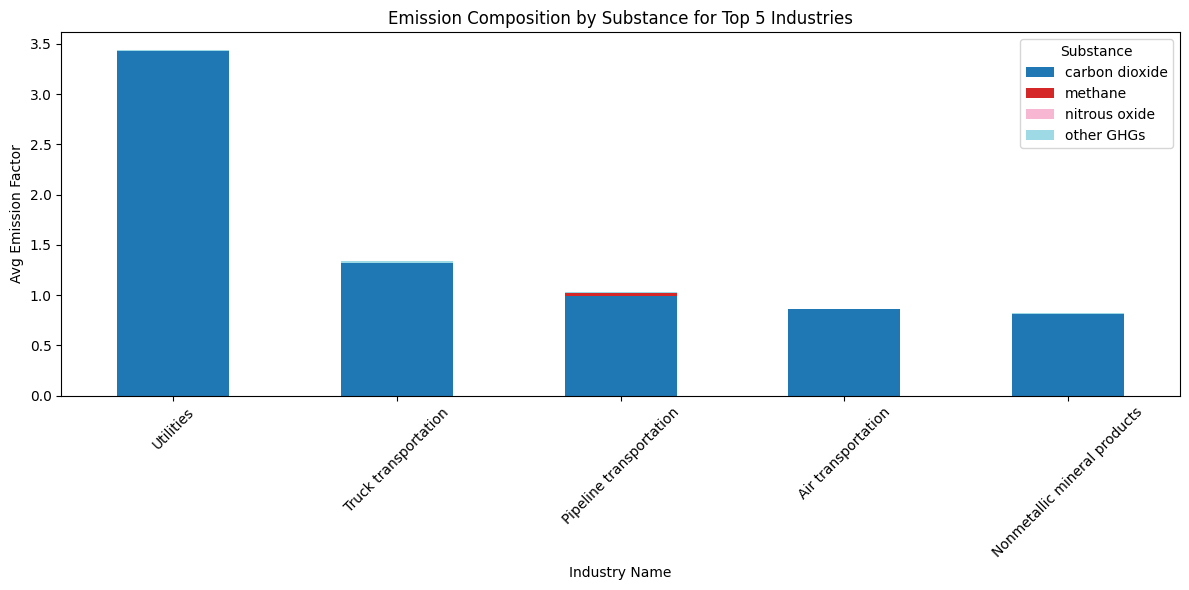

In [ ]:
# Pivot table: industries as rows, substances as columns
pivot_df = df_cleaned.pivot_table(
    index="Industry Name",
    columns="Substance",
    values="Supply Chain Emission Factors without Margins",
    aggfunc="mean"
).fillna(0)

# Get top 5 industries by total emissions (sum across substances)
top5_industries = pivot_df.sum(axis=1).sort_values(ascending=False).head(5).index

# Filter for those industries only
stacked_data = pivot_df.loc[top5_industries]

# Plot
stacked_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Emission Composition by Substance for Top 5 Industries")
plt.ylabel("Avg Emission Factor")
plt.xticks(rotation=45)
plt.legend(title="Substance")
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-773357575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


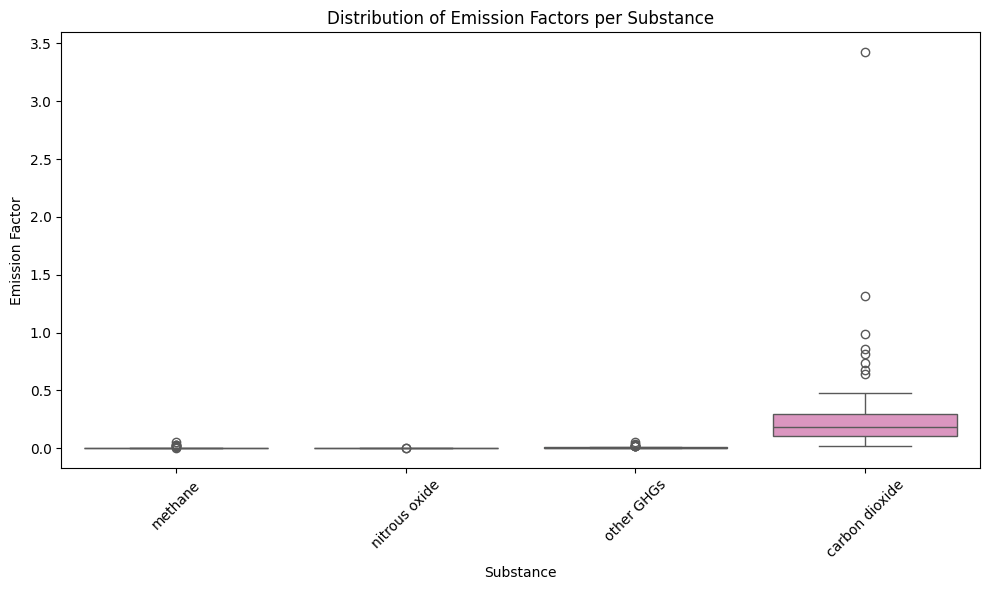

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_cleaned,
    x="Substance",
    y="Supply Chain Emission Factors without Margins",
    palette="Set2"
)
plt.title("Distribution of Emission Factors per Substance")
plt.ylabel("Emission Factor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


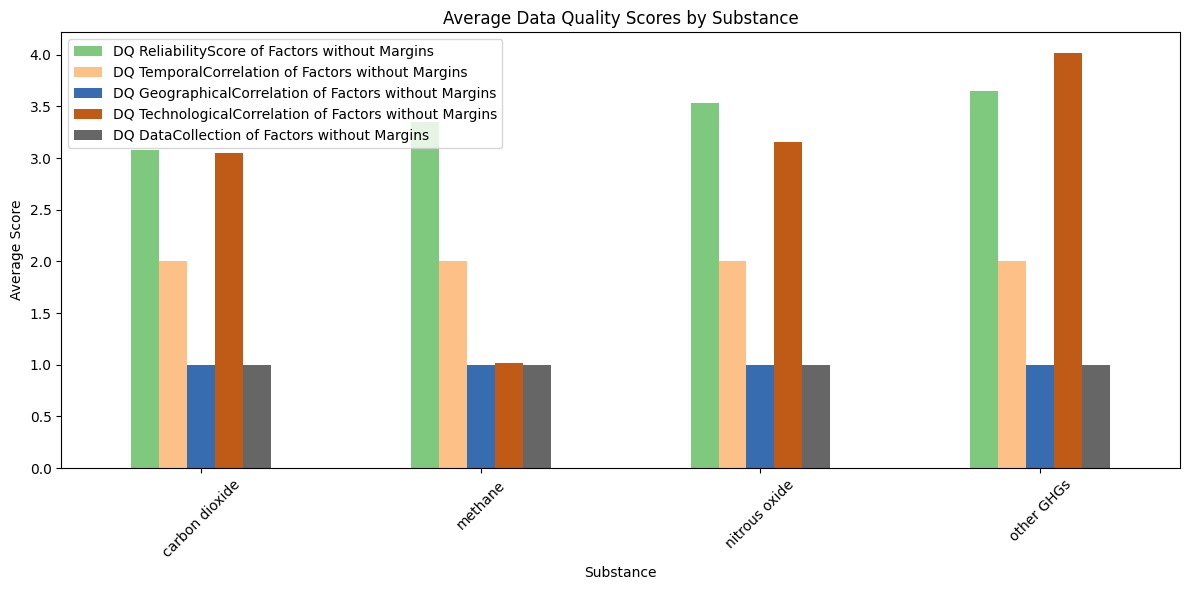

In [ ]:
# Average DQ scores grouped by substance
dq_columns = [col for col in df_cleaned.columns if col.startswith("DQ ")]
dq_avg_by_substance = df_cleaned.groupby("Substance")[dq_columns].mean()

# Plot DQ scores for top 4 substances
dq_avg_by_substance.head(4).plot(kind="bar", figsize=(12, 6), colormap="Accent")
plt.title("Average Data Quality Scores by Substance")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


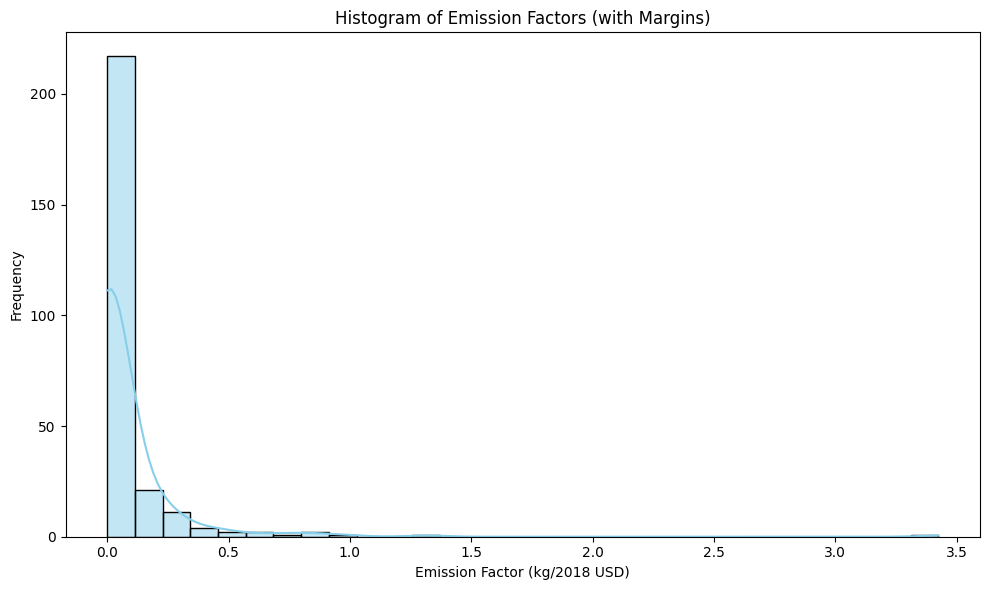

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Supply Chain Emission Factors with Margins'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Histogram of Emission Factors (with Margins)')
plt.xlabel('Emission Factor (kg/2018 USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
